# Import Section

## Specify the Paths to all the libs for all the experimental stuff

In [1]:
from Lab_Equipment.Config import config 

Current Directory: c:\Users\Experiment\Documents\RelBohmTraj\ExperimentStuff
This is a Windows system.


## Import all libs

In [2]:
# Python Libs
import cv2
import numpy as np
import matplotlib.pyplot as plt
import ctypes
import copy
from IPython.display import display, clear_output
import ipywidgets
# import multiprocessing
# from multiprocessing import shared_memory
import time
import scipy.io

from scipy import io, integrate, linalg, signal
from scipy.io import savemat, loadmat
from scipy.fft import fft, fftfreq, fftshift,ifftshift, fft2,ifft2,rfft2,irfft2
# Defult Pploting properties 
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [5,5]

# from script_functions import start_worker
# import CameraWindowForm as CamForm
#Moku Libs
import Lab_Equipment.MokuLab.MokuLabObject as mokulib

# #SLM Libs
# import Lab_Equipment.SLM.pyLCOS as pyLCOS
# import Lab_Equipment.ZernikeModule.ZernikeModule as zernMod

# #Camera Libs
# import Lab_Equipment.Camera.CameraObject as CamForm
# import Lab_Equipment.Camera.AlliedVisionCameraObj as AlliedCamForm
# import Lab_Equipment.Camera.QImagCameraObj as QCamForm
# # import Lab_Equipment.Camera.XenicsCameraObj as XCForm
# # import Lab_Equipment.Camera.FLIRCameraObj as FLIRForm

# # digiHolo Libs
# import Lab_Equipment.digHolo.digHolo_pylibs.digiholoHeader as digH_hpy  # as in header file for python... pretty clever I know (Daniel 2 seconds after writing this commment. Head slap you are a idiot )
# import Lab_Equipment.digHolo.digHolo_pylibs.digiholoWindowForm as digForm
# import Lab_Equipment.digHolo.digHolo_pylibs.digholoCombinedFunction as digholoFuncWrapper

# #MPLC Libs
# import Lab_Equipment.MPLC.AlignmentRoutines as AlignRoutines

# Daniel's Python Libs
import  Lab_Equipment.MyPythonLibs.OpticalOperators as OpticOp
import  Lab_Equipment.MyPythonLibs.ComplexPlotFunction as cmplxplt
import  Lab_Equipment.MyPythonLibs.GaussianBeamBasis as GaussBeams
import  Lab_Equipment.MyPythonLibs.GeneralFunctions as GenFuncs
import  Lab_Equipment.MyPythonLibs.AnalysisFuncitons as ProCouplMat
import  Lab_Equipment.MyPythonLibs.CoupMatrixAndMetricAnalysisFuncitons as MetricCals
import  Lab_Equipment.MyPythonLibs.SaveMaskToBinFile as SaveMaskBin
import  Lab_Equipment.MyPythonLibs.ModelabProcessBatchFile as Modelab
# import MyPythonLibs.QuantumGateGenerator as QGateGen
# import Lab_Equipment.TimeTagger.TimeTaggerInterface as TimeTaggerMod



Current Directory: c:\Users\Experiment\Documents\RelBohmTraj\ExperimentStuff
Current Directory: c:\Users\Experiment\Documents\RelBohmTraj\ExperimentStuff


## Make all the external Libs live update

In [3]:
# This is needed to Qt stuff (I think()
%pylab inline
%gui qt5

%load_ext autoreload
#Config File
%aimport Lab_Equipment.Config.config
%aimport Lab_Equipment.MokuLab.MokuLabObject

# Daniel's Python Libs
%aimport Lab_Equipment.MyPythonLibs.AnalysisFuncitons
%aimport Lab_Equipment.MyPythonLibs.OpticalOperators
%aimport Lab_Equipment.MyPythonLibs.ComplexPlotFunction
%aimport Lab_Equipment.MyPythonLibs.GaussianBeamBasis
%aimport Lab_Equipment.MyPythonLibs.GeneralFunctions
%aimport Lab_Equipment.MyPythonLibs.SaveMaskToBinFile
%aimport Lab_Equipment.MyPythonLibs.ModelabProcessBatchFile

%autoreload 1

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


c:\Users\Experiment\Anaconda3\Lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['linalg', 'rfft2', 'ifft2', 'fft', 'irfft2', 'copy', 'fft2']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [60]:

del mokuObj

Moku Class has been destroyed


# Launch Moku PID
#### This will start the moku PID thread. If you need to stop the moku thread you should close the plot window by clicking on the window and pressing q on the keyboard. You should then delete the object in the notbook

In [58]:
mokuObj=mokulib.MokuObject()

# del mokuObj # this will delete the mokuObj and makes sure that all thread memory is cleaned up
# if you need to debug stuff in the thread this will help 
# flag =mokuObj.queue.get_nowait(); print(flag)

In [34]:
flag =mokuObj.queue.get_nowait(); print(flag)

0.50184288


In [12]:
mokuObj.MokuProcess

<Process name='Process-1' pid=9692 parent=17728 stopped exitcode=1>

In [59]:
mokuObj.SetEnablePID()

In [56]:
mokuObj.SetInputOffset(-0.2)
# mokuObj.SetInt_crossover(0.3)


In [53]:

mokuObj.SetTimebase(-4,4)

KeyboardInterrupt: 

In [52]:
# mokuObj.SetSingleCapMode()
mokuObj.SetContinousCapMode()

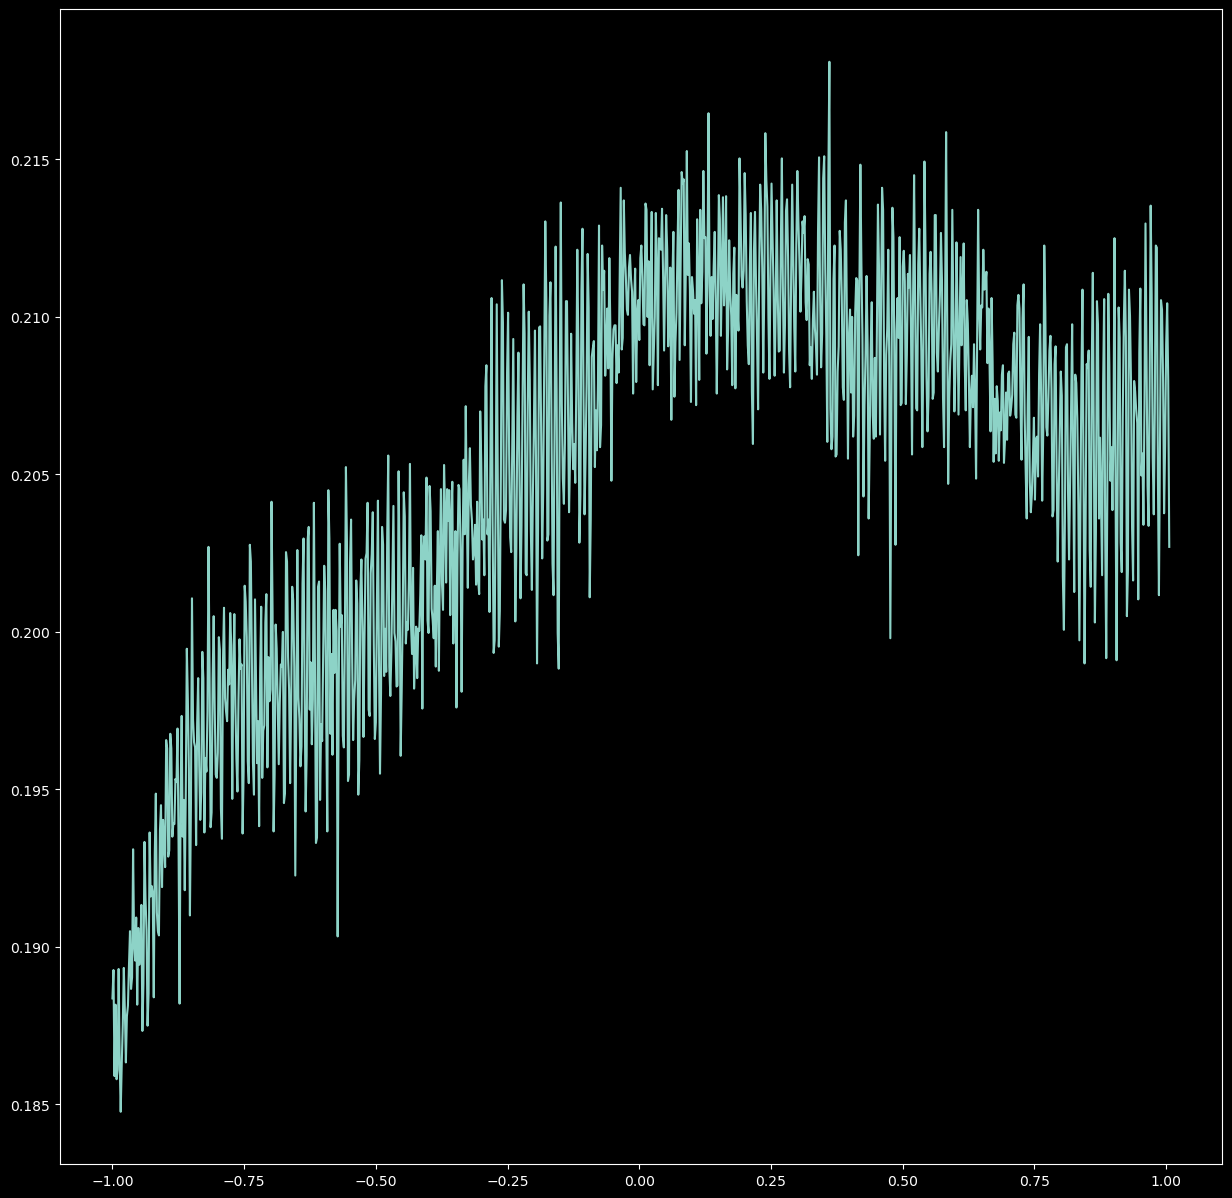

In [51]:

OscData=mokuObj.Getdata_Osc()
plt.plot(OscData[0,:],OscData[1,:])

In [47]:

mokuObj.SetGraphLimits()

KeyboardInterrupt: 

In [ ]:
OscData=mokuObj.Getdata_Osc()
mokuObj.SetContinousCapMode()
mokuObj.SetSingleCapMode()
mokuObj.SetTimebase(-1,1)
mokuObj.SetInputOffset(-0.3)
mokuObj.SetEnablePID()
mokuObj.SetInt_crossover(300e-3)
mokuObj.SetGraphLimits()



# Launch a TimeTagger 

In [ ]:
taggerObj = TimeTaggerMod.TimeTaggerInterface()
taggerObj.setBinWidth(1000)
taggerObj.setCountingTime(0.3*1e12)
# taggerObj.setTriggerLevel(5, 0.226)
# taggerObj.setTriggerLevel(6, 0.226)
# taggerObj.setContinuousCaptureMode()
# taggerObj.setSingleCaptureMode()
taggerObj.setCountingTime(10*1e12)
taggerObj.setDelayTime(665)
taggerObj.setBinNumber(500)
taggerObj.setBinWidth(1)


# This will get a plot that is the same as the Bi-directional Histagram in the timetagger software

In [ ]:
CorrData=taggerObj.getCorrelatinoGraph()
plt.plot(CorrData[0,:]/1e12,CorrData[1,:])
maxIdax=np.argmax(CorrData[1,:])
print(CorrData[0,maxIdax])
minval=np.min(CorrData[1,:])

idx_r=maxIdax
val=CorrData[1,idx_r]
while val>minval:
    idx_r=idx_r+1
    if idx_r>len(CorrData[1,:]):
        break
    val=CorrData[1,idx_r]
 
idx_l=maxIdax
val=CorrData[1,idx_l]
while val>minval:
    idx_l=idx_l-1
    if (idx_l<0):
        break
    val=CorrData[1,idx_l]

print(CorrData[0,idx_l]/1e12,CorrData[0,maxIdax]/1e12,CorrData[0,idx_r]/1e12)
print(CorrData[0,idx_r]-CorrData[0,idx_l])


plt.plot(CorrData[0,idx_l]/1e12,CorrData[1,idx_l],'.',markersize=12)
plt.plot(CorrData[0,maxIdax]/1e12,CorrData[1,maxIdax],'.',markersize=12)
plt.plot(CorrData[0,idx_r]/1e12,CorrData[1,idx_r],'.',markersize=12)
